# Fundamentos de IA e Machine Learning

Nesse curso serão abordados conceitos iniciais sobre Programação Orientada a Objetos, APIs e Machine Learning.

Vamos usar python ao longo de todo o curso. A escolha por python se justifica principalmente por três fatores: (i) é uma linguagem de programação intuitiva e de rápida curva de aprendizado, (ii) dispões de diversas bibliotecas que auxiliam em diversas atividades e (iii) dada a popularidade da linguagem, a comunidade de usuários de python é muito grande, o que facilita a comunicação e aprendizado por e entre usuários.

Nesta aula tivemos um overview das principais bibliotecas do python: numpy, scipy, matplotlib, pandas, tensorflow, keras, pytorch e seaborn. Exemplos de códigos utilizando essas bibliotecas foram apresentados, de modo a expor o aluno aos primeiros contatos com essas novas ferramentas.  

In [35]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.linear_model import LinearRegression
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import torch
import torch.nn as nn
import torch.optim as optim

In [5]:
data = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
mean = np.mean(data)
print(mean)

5.0


In [11]:
def dydt(t, y):
   return -0.5 * y

solution = solve_ivp(dydt, [0, 10], [2])
print(solution.y[0])

[2.         1.88835583 1.0632438  0.43316531 0.18014905 0.07480841
 0.03105019 0.01350782]


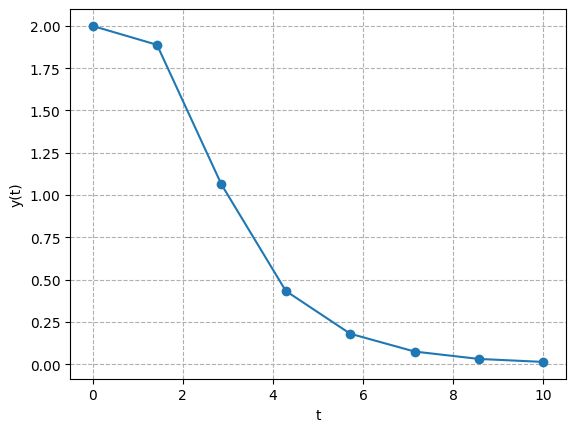

In [25]:
t = np.linspace(0,10,len(solution.y[0]))

plt.plot(t, solution.y[0], 'o-')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.grid(True, ls='--')
plt.show()

In [26]:
X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
y = np.dot(X, np.array([1, 2])) + 3

model = LinearRegression().fit(X, y)
print(model.coef_)

[1. 2.]


In [29]:
# Exemplo de dados de entrada
# X: matriz com 100 amostras e 3 características
# y: vetor de saída com 100 valores
X = np.random.random((100, 3))
y = np.random.random((100, 1))

# Definindo o modelo usando Input
inputs = tf.keras.Input(shape=(3,))
x = tf.keras.layers.Dense(10, activation='relu')(inputs)
outputs = tf.keras.layers.Dense(1)(x)
model = tf.keras.Model(inputs=inputs, outputs=outputs)

# Compilando o modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Treinando o modelo
model.fit(X, y, epochs=5)

Epoch 1/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.1843
Epoch 2/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1874
Epoch 3/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1563 
Epoch 4/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.1538 
Epoch 5/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1287 


In [32]:
# Exemplo de dados de entrada
# X: matriz com 100 amostras e 8 características
# y: vetor de saída com 100 valores binários (0 ou 1)
X = np.random.random((100, 8))
y = np.random.randint(2, size=(100, 1))

# Definindo o modelo
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compilando o modelo
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Treinando o modelo
model.fit(X, y, epochs=5, batch_size=10)

Epoch 1/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.5466 - loss: 0.7123
Epoch 2/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4870 - loss: 0.7283
Epoch 3/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5094 - loss: 0.7063
Epoch 4/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4537 - loss: 0.7013  
Epoch 5/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4725 - loss: 0.7049 


In [33]:
# Exemplo de dados de entrada
# X: matriz com 100 amostras e 3 características
# y: vetor de saída com 100 valores
X = torch.randn(100, 3)  # Gera uma matriz de 100x3 com valores aleatórios
y = torch.randn(100, 1)  # Gera um vetor de 100x1 com valores aleatórios

class SimpleNN(nn.Module):
   def __init__(self):
       super(SimpleNN, self).__init__()
       self.fc1 = nn.Linear(3, 10)
       self.fc2 = nn.Linear(10, 1)

   def forward(self, x):
       x = torch.relu(self.fc1(x))
       x = self.fc2(x)
       return x

model = SimpleNN()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

for epoch in range(6):
   optimizer.zero_grad()
   outputs = model(X)
   loss = criterion(outputs, y)
   loss.backward()
   optimizer.step()
   print(f'Epoch [{epoch+1}/100], Loss: {loss.item():.4f}')

Epoch [1/100], Loss: 1.0602
Epoch [2/100], Loss: 1.0384
Epoch [3/100], Loss: 1.0209
Epoch [4/100], Loss: 1.0082
Epoch [5/100], Loss: 0.9993
Epoch [6/100], Loss: 0.9929
